In [2]:
# 1. Data Handling and Preprocessing
import os
import pathlib
import pandas as pd

# 2. Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Deep Learning
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models

# 4. Audio Processing 
import librosa

# 5. Interactive Visualization 
import plotly.express as px
from IPython import display
from IPython.display import Audio as ipd


In [3]:
# Check if the data directory exists
my_data = "speech-emotion-recognition-en"
if not os.path.exists(my_data):
    
    print("Error: Data directory not found. Please ensure the Kaggle dataset is mounted correctly.")
    
    exit(1)

In [4]:
# Define paths to different datasets
Crema_path = my_data + "/Crema/"
Ravdess_path = my_data + "/Ravdess/audio_speech_actors_01-24/"
Savee_path = my_data + "/Savee/"
Tess_path = my_data + "/Tess/"

In [5]:
# Print the sorted file lists with clear labels
print("Crema Files:")
for filename in Crema_path:
    print(f"  - {filename}")

print("\nRavdess Files:")
for filename in Ravdess_path:
    print(f"  - {filename}")

print("\nSavee Files:")
for filename in Savee_path:
    print(f"  - {filename}")

print("\nTess Files:")
for filename in Tess_path:
    print(f"  - {filename}")

Crema Files:
  - s
  - p
  - e
  - e
  - c
  - h
  - -
  - e
  - m
  - o
  - t
  - i
  - o
  - n
  - -
  - r
  - e
  - c
  - o
  - g
  - n
  - i
  - t
  - i
  - o
  - n
  - -
  - e
  - n
  - /
  - C
  - r
  - e
  - m
  - a
  - /

Ravdess Files:
  - s
  - p
  - e
  - e
  - c
  - h
  - -
  - e
  - m
  - o
  - t
  - i
  - o
  - n
  - -
  - r
  - e
  - c
  - o
  - g
  - n
  - i
  - t
  - i
  - o
  - n
  - -
  - e
  - n
  - /
  - R
  - a
  - v
  - d
  - e
  - s
  - s
  - /
  - a
  - u
  - d
  - i
  - o
  - _
  - s
  - p
  - e
  - e
  - c
  - h
  - _
  - a
  - c
  - t
  - o
  - r
  - s
  - _
  - 0
  - 1
  - -
  - 2
  - 4
  - /

Savee Files:
  - s
  - p
  - e
  - e
  - c
  - h
  - -
  - e
  - m
  - o
  - t
  - i
  - o
  - n
  - -
  - r
  - e
  - c
  - o
  - g
  - n
  - i
  - t
  - i
  - o
  - n
  - -
  - e
  - n
  - /
  - S
  - a
  - v
  - e
  - e
  - /

Tess Files:
  - s
  - p
  - e
  - e
  - c
  - h
  - -
  - e
  - m
  - o
  - t
  - i
  - o
  - n
  - -
  - r
  - e
  - c
  - o
  - g
  - n
  

In [6]:
import numpy as np
# List audio commands in the directory
commands = np.array(tf.io.gfile.listdir(str(my_data)))
commands = commands[(commands != 'README.md') & (commands != '.DS_Store')]

print('Available Audio Commands:', commands)

Available Audio Commands: ['Crema' 'Ravdess' 'Savee' 'Tess']


In [7]:
import os
import pandas as pd

def process_dataset(dataset_path):
    file_emotion = []
    file_path = []

    for actor_dir in os.listdir(dataset_path):
        actor_path = os.path.join(dataset_path, actor_dir)
        
        if os.path.isdir(actor_path):  
            for filename in os.listdir(actor_path):
                file_full_path = os.path.join(actor_path, filename)
                
                if os.path.isfile(file_full_path):
                    part = filename.split('.')[0].split('-')  

                    if len(part) == 7: 
                        try:
                           
                            emotion = int(part[2]) 

                            file_emotion.append(emotion)
                            file_path.append(file_full_path)

                        except ValueError:
                            print(f"Skipping file {filename} due to invalid format.")
                    else:
                        print(f"Skipping file {filename} due to unexpected filename format.")
        else:
            print(f"Skipping {actor_dir}, not a directory.")

    return file_emotion, file_path


file_emotion, file_path = process_dataset(Ravdess_path)


emotion_df = pd.DataFrame(file_emotion, columns=['Emotion'])
path_df = pd.DataFrame(file_path, columns=['Path'])


emotion_map = {1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}
emotion_df.Emotion.replace(emotion_map, inplace=True)


ravdess_df = pd.concat([emotion_df, path_df], axis=1)


print(ravdess_df.head())
print("______________________________________________")
print(ravdess_df.tail())
print("_______________________________________________")
print(ravdess_df.Emotion.value_counts())

# Save the result to a CSV file if needed
ravdess_df.to_csv("ravdess_emotion_paths.csv", index=False)


   Emotion                                               Path
0  neutral  speech-emotion-recognition-en/Ravdess/audio_sp...
1  neutral  speech-emotion-recognition-en/Ravdess/audio_sp...
2  neutral  speech-emotion-recognition-en/Ravdess/audio_sp...
3  neutral  speech-emotion-recognition-en/Ravdess/audio_sp...
4     calm  speech-emotion-recognition-en/Ravdess/audio_sp...
______________________________________________
       Emotion                                               Path
1435  surprise  speech-emotion-recognition-en/Ravdess/audio_sp...
1436  surprise  speech-emotion-recognition-en/Ravdess/audio_sp...
1437  surprise  speech-emotion-recognition-en/Ravdess/audio_sp...
1438  surprise  speech-emotion-recognition-en/Ravdess/audio_sp...
1439  surprise  speech-emotion-recognition-en/Ravdess/audio_sp...
_______________________________________________
calm        192
happy       192
sad         192
angry       192
fear        192
disgust     192
surprise    192
neutral      96
Name: Emo

In [8]:
Crema_path = my_data + "/Crema/" 
crema_directory_list = os.listdir(Crema_path) 

file_emotion = []
file_path = []

for file in crema_directory_list:
   
    file_path.append(Crema_path + file)
    
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')


emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])


path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()
print(Crema_df)

     Emotions                                               Path
0       angry  speech-emotion-recognition-en/Crema/1001_DFA_A...
1     disgust  speech-emotion-recognition-en/Crema/1001_DFA_D...
2        fear  speech-emotion-recognition-en/Crema/1001_DFA_F...
3       happy  speech-emotion-recognition-en/Crema/1001_DFA_H...
4     neutral  speech-emotion-recognition-en/Crema/1001_DFA_N...
...       ...                                                ...
7437  disgust  speech-emotion-recognition-en/Crema/1091_WSI_D...
7438     fear  speech-emotion-recognition-en/Crema/1091_WSI_F...
7439    happy  speech-emotion-recognition-en/Crema/1091_WSI_H...
7440  neutral  speech-emotion-recognition-en/Crema/1091_WSI_N...
7441      sad  speech-emotion-recognition-en/Crema/1091_WSI_S...

[7442 rows x 2 columns]


In [9]:
Tess_path = my_data + "/Tess/"

tess_directory_list = os.listdir(Tess_path) 

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess_path + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess_path + dir + '/' + file) 


emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])


path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()
print(Tess_df.Emotions.value_counts())

angry       400
disgust     400
fear        400
happy       400
neutral     400
surprise    400
sad         400
Name: Emotions, dtype: int64


In [10]:
Savee_path = my_data + "/Savee/"

savee_directory_list = os.listdir(Savee_path) 

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee_path + file) 
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')


emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])


path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()
print(Savee_df.Emotions.value_counts())

neutral     120
angry        60
disgust      60
fear         60
happy        60
sad          60
surprise     60
Name: Emotions, dtype: int64


In [11]:
data_path = pd.concat([ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotion,Path,Emotions
0,neutral,speech-emotion-recognition-en/Ravdess/audio_sp...,NaN
1,neutral,speech-emotion-recognition-en/Ravdess/audio_sp...,NaN
2,neutral,speech-emotion-recognition-en/Ravdess/audio_sp...,NaN
3,neutral,speech-emotion-recognition-en/Ravdess/audio_sp...,NaN
4,calm,speech-emotion-recognition-en/Ravdess/audio_sp...,NaN


In [12]:
print(data_path.Emotions.value_counts())

angry       1731
disgust     1731
fear        1731
happy       1731
sad         1731
neutral     1607
surprise     460
Name: Emotions, dtype: int64


In [13]:
emotion_counts = data_path['Emotions'].value_counts()
colors = ['blue', 'yellow', 'green', 'purple', 'gray', 'red', 'darkred']

fig = px.bar(
    emotion_counts,
    x=emotion_counts.index,
    y=emotion_counts.values,
    color=emotion_counts.index,
    color_discrete_sequence=colors,
    title='Distribution of Emotions in Dataset'
)

fig.update_layout(
    xaxis_title='Emotion',
    yaxis_title='Count',
    showlegend=True
)

fig.show()


In [14]:
data,sr = librosa.load(file_path[0])
sr


22050

In [15]:
import librosa
from IPython.display import Audio

data, sr = librosa.load(file_path[0])  
print(f"Sample rate: {sr}")
Audio(data, rate=sr)


Sample rate: 22050


In [16]:
import numpy as np
import librosa
import plotly.graph_objects as go  


def create_log_mel_spectrogram_plotly(data, sr):
    
    spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128, fmax=8000)
    log_spectrogram = librosa.power_to_db(spectrogram)

    
    fig = go.Figure(data=go.Heatmap(
        z=log_spectrogram,
        x=np.linspace(0, len(data) / sr, num=log_spectrogram.shape[1]),
        y=librosa.mel_frequencies(n_mels=128, fmax=8000),
        colorscale='Viridis',
        colorbar=dict(title='dB')
    ))

    
    fig.update_layout(
        title='Log Mel Spectrogram',
        xaxis_title='Time (s)',
        yaxis_title='Frequency (Hz)',
        height=600,
        width=800
    )

    
    fig.show()


create_log_mel_spectrogram_plotly(data, sr)


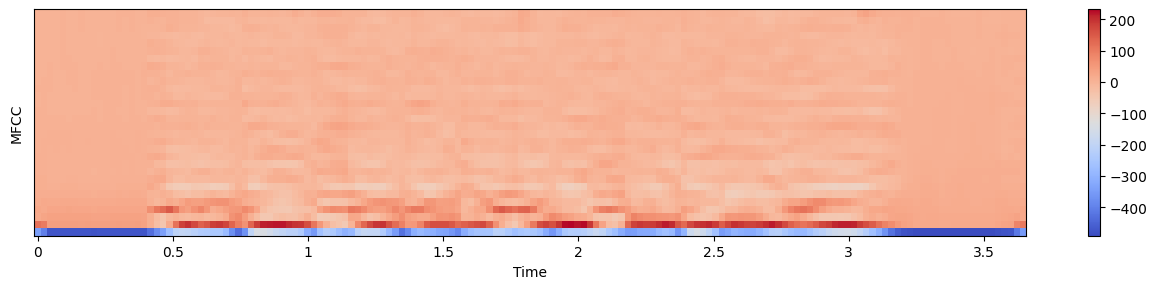

In [17]:
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)


# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

Audio(data,rate=sr)

In [18]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

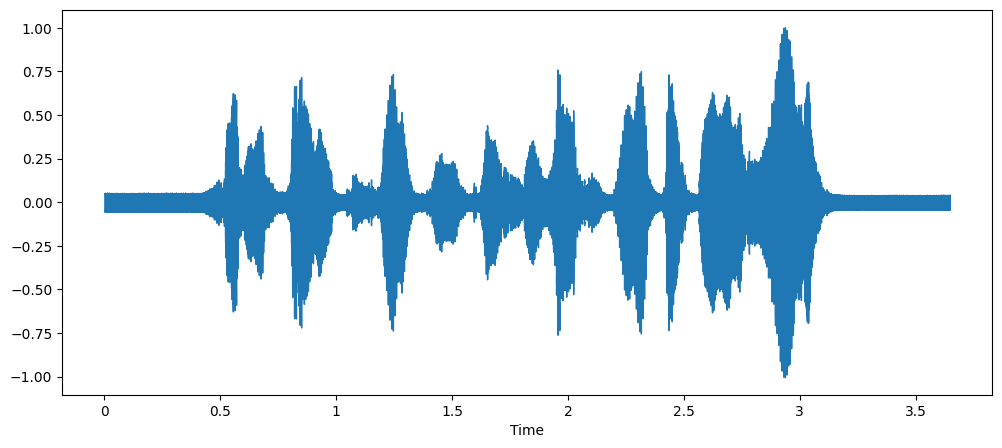

In [19]:
# NORMAL AUDIO


import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr)
Audio(data,rate=sr)

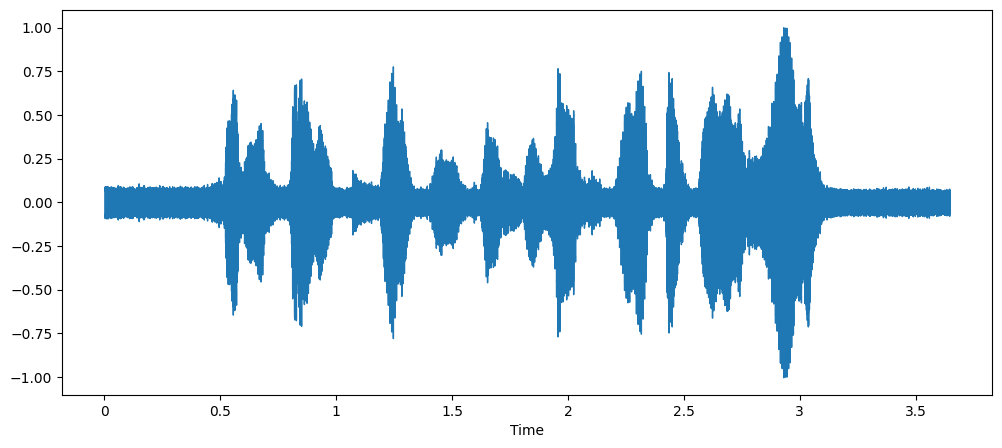

In [20]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
Audio(x, rate=sr)

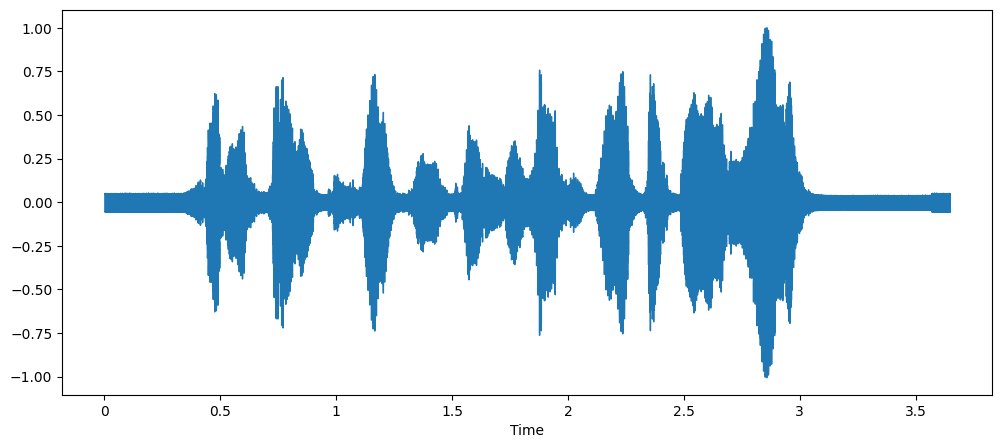

In [21]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
Audio(x, rate=sr)

In [22]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr) # Changed waveplot to waveshow
    plt.show()

def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

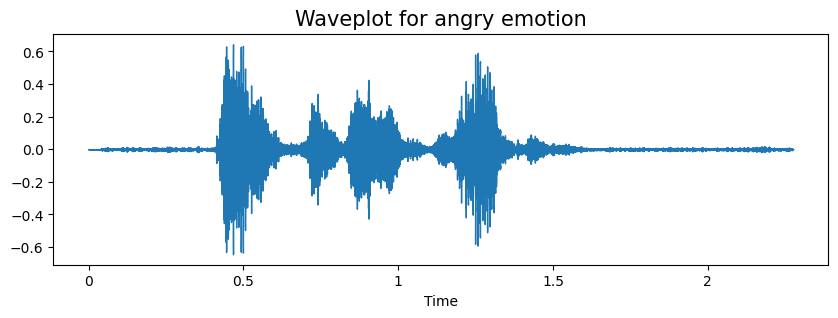

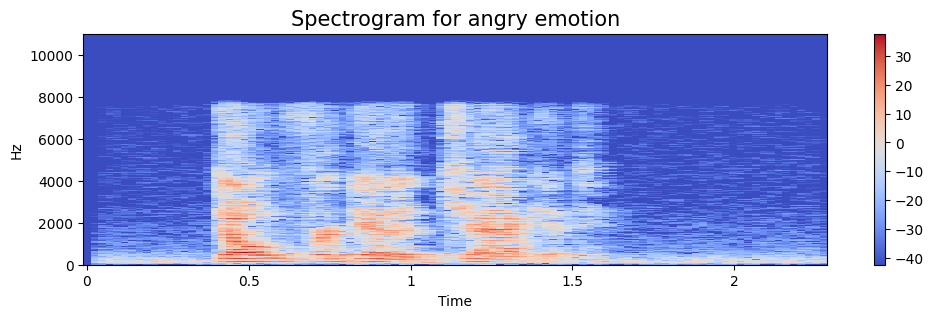

In [23]:
# Import IPython.display and alias it as ipyd
import IPython.display as ipyd

emotion='angry'
path = np.array(Crema_df.Path[Crema_df.Emotions==emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
ipyd.Audio(path) # Call Audio using the alias

In [24]:
labels = {'disgust':0,'happy':1,'sad':2,'neutral':3,'fear':4,'angry':5}
Crema_df.replace({'Emotions':labels},inplace=True)

In [25]:
import librosa
import librosa.display 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipyd



num_mfcc=13
n_fft=2048
hop_length=512
SAMPLE_RATE = 22050
data = {
        "labels": [],
        "mfcc": []
    }
for i in range(7442):
    data['labels'].append(Crema_df.iloc[i,0])
    signal, sample_rate = librosa.load(Crema_df.iloc[i,1], sr=SAMPLE_RATE)
    mfcc = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=13, n_fft=2048, hop_length=512)
    mfcc = mfcc.T
    data["mfcc"].append(np.asarray(mfcc))
    if i%500==0:
        print(i)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000


In [26]:

max_len = max(len(mfcc) for mfcc in data['mfcc'])


for i, mfcc in enumerate(data['mfcc']):
    if len(mfcc) < max_len:
        pad_width = max_len - len(mfcc)
        data['mfcc'][i] = np.pad(mfcc, ((0, pad_width), (0, 0)), 'constant')

In [29]:
X = tf.keras.preprocessing.sequence.pad_sequences(X)
X.shape

(7442, 216, 13)

In [28]:
from sklearn.model_selection import train_test_split
# Once the lengths match, proceed with train_test_split
X = np.array(data['mfcc'])
y = np.array(data['labels'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

In [30]:
print(X_train.shape,y_train.shape,X_validation.shape,y_validation.shape,X_test.shape,y_test.shape)

(5357, 216, 13) (5357,) (1340, 216, 13) (1340,) (745, 216, 13) (745,)


In [31]:
from tensorflow.keras.layers import LSTM,Dense,Dropout

def build_model(input_shape):
    model = tf.keras.Sequential()

    model.add(LSTM(128, input_shape=input_shape, return_sequences=True))
    model.add(LSTM(64))

    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))

    model.add(Dense(6, activation='softmax'))

    return model

In [32]:
# create network
input_shape = (None,13)
model = build_model(input_shape)

# compile model
optimiser = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model.summary()

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, None, 128)      │        72,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,662 (494.77 KB)

 Trainable params: 126,662 (494.77 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=800)

Epoch 1/800
168/168 ━━━━━━━━━━━━━━━━━━━━ 73s 420ms/step - accuracy: 0.1737 - loss: 1.7822 - val_accuracy: 0.3343 - val_loss: 1.5792
Epoch 2/800
168/168 ━━━━━━━━━━━━━━━━━━━━ 90s 535ms/step - accuracy: 0.3170 - loss: 1.6189 - val_accuracy: 0.3373 - val_loss: 1.5309
Epoch 3/800
168/168 ━━━━━━━━━━━━━━━━━━━━ 121s 411ms/step - accuracy: 0.3455 - loss: 1.5559 - val_accuracy: 0.3381 - val_loss: 1.5398
Epoch 4/800
168/168 ━━━━━━━━━━━━━━━━━━━━ 76s 371ms/step - accuracy: 0.3654 - loss: 1.5369 - val_accuracy: 0.3597 - val_loss: 1.4834
Epoch 5/800
168/168 ━━━━━━━━━━━━━━━━━━━━ 85s 388ms/step - accuracy: 0.3462 - loss: 1.5610 - val_accuracy: 0.3284 - val_loss: 1.5261
Epoch 6/800
168/168 ━━━━━━━━━━━━━━━━━━━━ 65s 387ms/step - accuracy: 0.3620 - loss: 1.5344 - val_accuracy: 0.3530 - val_loss: 1.4933
Epoch 7/800
168/168 ━━━━━━━━━━━━━━━━━━━━ 64s 380ms/step - accuracy: 0.3889 - loss: 1.4841 - val_accuracy: 0.3634 - val_loss: 1.4829
Epoch 8/800
168/168 ━━━━━━━━━━━━━━━━━━━━ 66s 391ms/step - accuracy: 0.3939 

KeyboardInterrupt: 

In [55]:
model.save_weights('best_model.weights.h5')

In [33]:
model.load_weights('best_model.weights.h5')

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning:

Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 



24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 177ms/step - accuracy: 0.8341 - loss: 1.2239
Test Accuracy: 0.8375838994979858
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 181ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       123
           1       0.82      0.87      0.84       140
           2       0.84      0.84      0.84       128
           3       0.82      0.88      0.84       112
           4       0.84      0.76      0.80       129
           5       0.89      0.96      0.92       113

    accuracy                           0.84       745
   macro avg       0.84      0.84      0.84       745
weighted avg       0.84      0.84      0.84       745



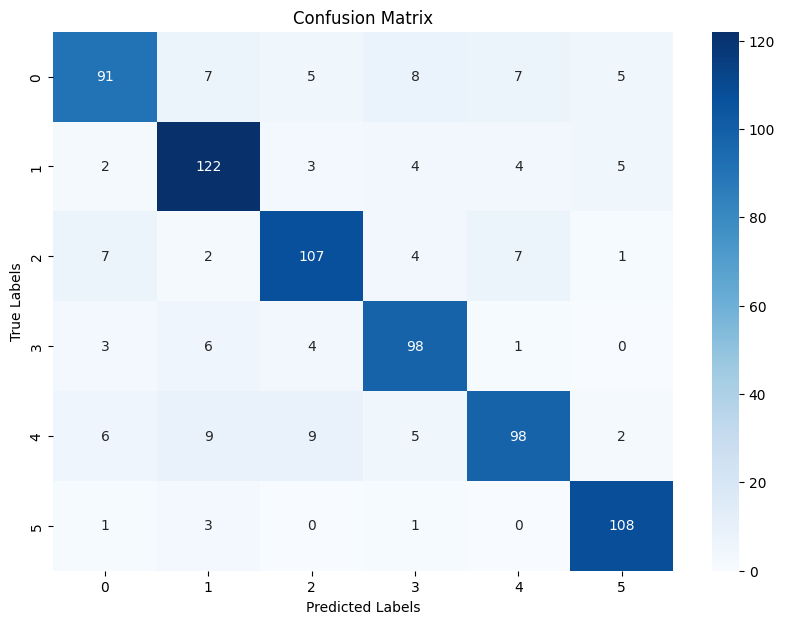

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(6), yticklabels=range(6))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()